<h1>Basic Preprocessing</h1>

In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt

# preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#textblob
from textblob import TextBlob


In [2]:
# import data
df = pd.read_csv('data/articles1.csv')
df.head(1)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...


<h2> Exploratory Data Analysis (EDA)</h2>

In [3]:
# check the number of columns and rows
df.shape

(50000, 10)

In [4]:
# stats of data 
df.describe(include='all')

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
count,50000.000000,50000.000000,50000,50000,43694,50000,50000.000000,50000.000000,0.0,50000
unique,NaN,NaN,49920,5,3603,983,NaN,NaN,NaN,49888
top,NaN,NaN,The 10 most important things in the world righ...,Breitbart,Breitbart News,2016-08-22,NaN,NaN,NaN,advertisement
freq,NaN,NaN,7,23781,1559,221,NaN,NaN,NaN,42
mean,25694.378380,44432.454800,NaN,NaN,NaN,NaN,2016.273700,5.508940,NaN,NaN
std,15350.143677,15773.615179,NaN,NaN,NaN,NaN,0.634694,3.333062,NaN,NaN
min,0.000000,17283.000000,NaN,NaN,NaN,NaN,2011.000000,1.000000,NaN,NaN
25%,12500.750000,31236.750000,NaN,NaN,NaN,NaN,2016.000000,3.000000,NaN,NaN
50%,25004.500000,43757.500000,NaN,NaN,NaN,NaN,2016.000000,5.000000,NaN,NaN
75%,38630.250000,57479.250000,NaN,NaN,NaN,NaN,2017.000000,8.000000,NaN,NaN


In [5]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   id           50000 non-null  int64  
 2   title        50000 non-null  object 
 3   publication  50000 non-null  object 
 4   author       43694 non-null  object 
 5   date         50000 non-null  object 
 6   year         50000 non-null  float64
 7   month        50000 non-null  float64
 8   url          0 non-null      float64
 9   content      50000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.8+ MB


In [6]:
# check for any missing values
df.isnull().sum()


Unnamed: 0         0
id                 0
title              0
publication        0
author          6306
date               0
year               0
month              0
url            50000
content            0
dtype: int64

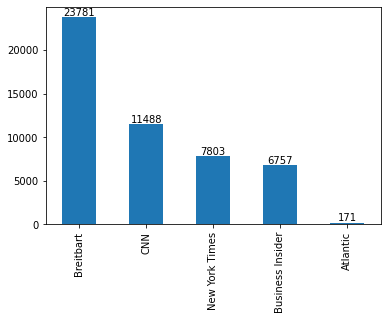

In [7]:
# check the news publication distribution
df['publication'].value_counts().plot(kind='bar')

# Add bar labels
for index, value in enumerate(df['publication'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

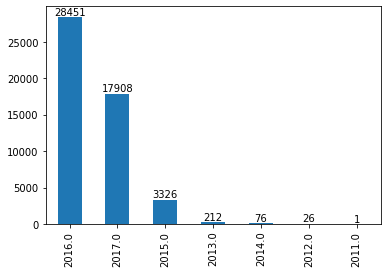

In [8]:
# check the news year distribution
df['year'].value_counts().plot(kind='bar')

# Add bar labels
for index, value in enumerate(df['year'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

<h2> Text Pre-Processing </h2>

In [9]:
# drop unnecessary columns
df = df[['title','publication','date','year','month','content']]
df.head(1)

,title,publication,date,year,month,content
0,House Republicans Fret About Winning Their Hea...,New York Times,2016-12-31,2016.0,12.0,WASHINGTON — Congressional Republicans have...


In [10]:
# Processsing for punctuation, stopwords, alphabetic words, lemmatizing 

# remove punctuation
def remove_punct(text):
    return re.sub('[^\w\s]', '', text)

df['content_remove_punct'] = df['content'].apply(remove_punct)

# lower text
df['content_remove_punct_lower'] = [w.lower() for w in df['content_remove_punct']]

# remove stopwords
lm = WordNetLemmatizer()
stop_list = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = re.split('\W+', text)
    text = [lm.lemmatize(word) for word in tokens if word.lower() not in stop_list]
    return text

df['content_remove_punct_stopwords_lower'] = df['content_remove_punct_lower'].apply(remove_stopwords)


df.head(1)

,title,publication,date,year,month,content,content_remove_punct,content_remove_punct_lower,content_remove_punct_stopwords_lower
0,House Republicans Fret About Winning Their Hea...,New York Times,2016-12-31,2016.0,12.0,WASHINGTON — Congressional Republicans have...,WASHINGTON Congressional Republicans have ...,washington congressional republicans have ...,"[washington, congressional, republican, new, f..."


In [11]:
from nltk.util import ngrams

# Generate bigrams
def generate_bigrams(text):
    return list(ngrams(text, 2))


df['content_bigram'] = df['content_remove_punct_stopwords_lower'].apply(generate_bigrams)
df.head(1)


,title,publication,date,year,month,content,content_remove_punct,content_remove_punct_lower,content_remove_punct_stopwords_lower,content_bigram
0,House Republicans Fret About Winning Their Hea...,New York Times,2016-12-31,2016.0,12.0,WASHINGTON — Congressional Republicans have...,WASHINGTON Congressional Republicans have ...,washington congressional republicans have ...,"[washington, congressional, republican, new, f...","[(washington, congressional), (congressional, ..."


In [ ]:
df.to_csv('data/preprocessed_v1.csv')  

In [12]:
# Load sentiment lexicon
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for individual words
def calculate_individual_words_ss(text):
    return [sia.polarity_scores(word)['compound'] for word in text]
    
df["word_sentiment_scores"] = df['content_remove_punct_stopwords_lower'].apply(calculate_individual_words_ss)

# Calculate sentiment scores for bigrams
def calculate_bigrams_ss(text):
    return [sia.polarity_scores(' '.join(bigram))['compound'] for bigram in text]
    
df["bigram_sentiment_scores"] = df['content_bigram'].apply(calculate_bigrams_ss)

# Aggregate sentiment scores
df['overall_sentiment_score'] = df['word_sentiment_scores'] + df['bigram_sentiment_scores']

# # Thresholding
# if overall_sentiment_score > 0:
#     sentiment_label = 'Positive'
# elif overall_sentiment_score < 0:
#     sentiment_label = 'Negative'
# else:
#     sentiment_label = 'Neutral'

# # Print results
# print("Sentiment Score:", overall_sentiment_score)
# print("Sentiment Label:", sentiment_label)

df.head(1)

[nltk_data] Downloading package vader_lexicon to C:\Users\Jing
[nltk_data]     Wen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


KeyboardInterrupt: 